# Cleaning of Data
We use this file to clean the data. Still work in progress...  
After use, save the cleaned versions in tx_cleaned.pkl, so we use the correct ones in the tasks.

In [75]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [76]:
from proj1_helpers import load_csv_data

data_path = 'data/train.csv'
y, x, ids = load_csv_data(data_path, sub_sample=False)

x

array([[ 138.47 ,   51.655,   97.827, ...,    1.24 ,   -2.475,  113.497],
       [ 160.937,   68.768,  103.235, ..., -999.   , -999.   ,   46.226],
       [-999.   ,  162.172,  125.953, ..., -999.   , -999.   ,   44.251],
       ...,
       [ 105.457,   60.526,   75.839, ..., -999.   , -999.   ,   41.992],
       [  94.951,   19.362,   68.812, ..., -999.   , -999.   ,    0.   ],
       [-999.   ,   72.756,   70.831, ..., -999.   , -999.   ,    0.   ]])

### Validate the data
In order to get a good feel of the dataset, we do some inference on the set. In the plot below we see that we have a lot of values that are -999. Those should be handled in the dataset.

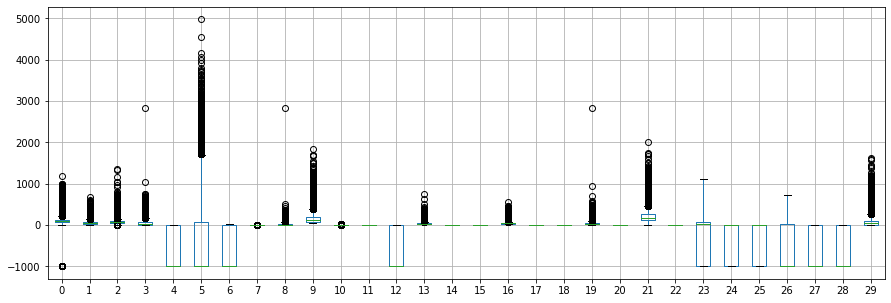

In [77]:
def boxplot(x):
    num_rows = 1
    num_cols = 1
    f, a = plt.subplots(num_rows, num_cols, figsize=(15,5))
    tx_df = pd.DataFrame(data=x)
    tx_df.boxplot()
    
boxplot(x)

- From the boxplot we see that many of the columns are distributed less than zero, even though a lot of the data is far above zero. A quick look at the dataset reveils a lot of values at -999, which has to be the go-to error-value in the dataset. Therefore we set all -999 to np.nan.


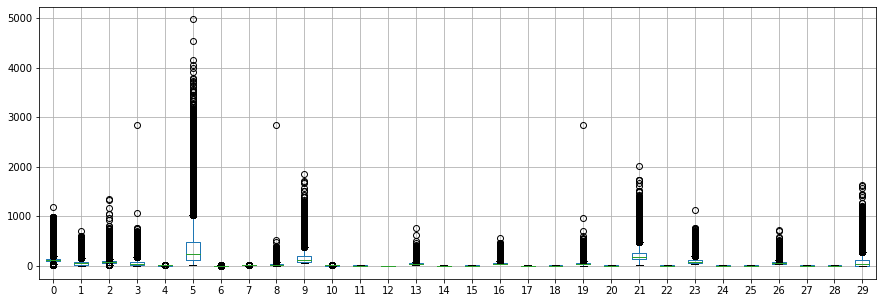

In [78]:
# Change all values that are equal to -999 in the dataset to np.nan
x_c = np.copy(x)
y_c = np.copy(y)
x_c[x_c == -999] = np.nan
y_c[y_c == -999] = np.nan

boxplot(x_c)


In [79]:
# Using Pandas to save to pickle
pd.DataFrame(data=tx_c).to_pickle('./pickles/tx_with_nan.pkl')
pd.DataFrame(data=y_c).to_pickle('./pickles/y_with_nan.pkl')


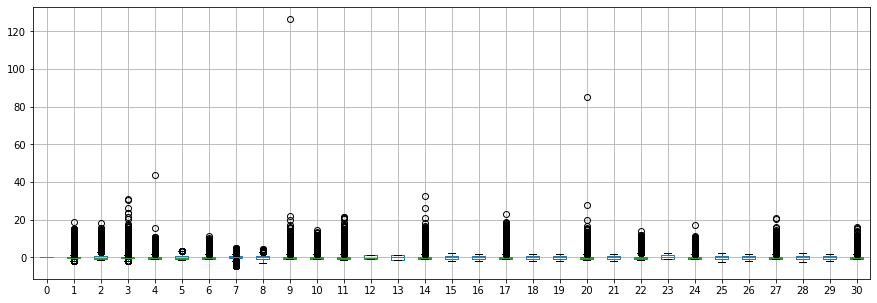

In [80]:
from helpers import build_tx, standardize

x_c = standardize(x_c)
tx_c = build_tx(x_c)

boxplot(tx_c)

In [81]:
# Using Pandas to save to pickle
pd.DataFrame(data=tx_c).to_pickle('./pickles/tx_stand.pkl')
pd.DataFrame(data=y_c).to_pickle('./pickles/y_stand.pkl')


/Users/theodor/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/theodor/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.


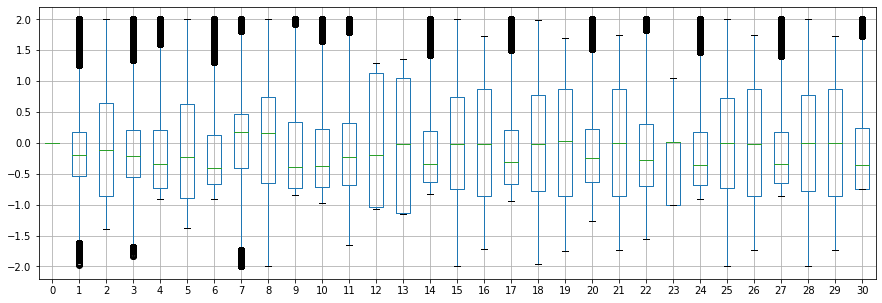

In [82]:
tx_std = np.nanstd(tx_c, axis = 0)
tx_no_outl = np.copy(tx_c)
tx_no_outl[tx_no_outl > 2*tx_std] = np.nan
tx_no_outl[tx_no_outl < -2*tx_std] = np.nan

boxplot(tx_no_outl)


In [83]:
# Using Pandas to save to pickle
pd.DataFrame(data=tx_c).to_pickle('./pickles/tx_no_outl.pkl')
pd.DataFrame(data=y_c).to_pickle('./pickles/y_no_outl.pkl')
